# Vylepsenia

Takze! Framework nam stoji a funguje. Teraz by sme sa s nim mohli trochu pohrat.


In [1]:
import numpy as np

from utils import dataset_Circles, dataset_Flower, draw_DecisionBoundary, draw_TrainingResults
from layer import Input, Dense
from loss import CreateLossFunction
from optimizer import GradientDescent
from model import Model


## 1. Underfit & Overfit

Kazdy machine learning problem je iny, a tazko dopredu odhadnut, aka kombinacia architektury siete a hyperparametrov bude fungovat najlepsie. Riesenie ML problemu je iterativny proces, pri ktorom sa skusaju rozne napady/moznosti/kombinacie.

Underfit a Overfit su situacie, ktore sa velmi casto vyskytuju a je dobre im rozumiet a vediet ich identifikovat.


In [5]:
def test_UnderfitOverfit(mTrain, mDev, noise, layers, epochs=50000):
    np.random.seed(1)

    # Spravime dataset
    X, Y = dataset_Circles(m=mTrain, noise=noise)
    devX, devY = dataset_Circles(m=mDev, noise=noise)

    # Spravime model
    model = Model(layers)
    model.initialize(loss=CreateLossFunction('bce'), optimizer=GradientDescent(0.05))

    # Ucime
    results = model.train(X, Y, epochs, 0, devX, devY, verboseInterval=5000)

    # Kreslime vysledok
    draw_TrainingResults(results)
    draw_DecisionBoundary(devX, devY, model)



### Underfit

Je situacia, pri ktorej siet nema dostatocnu kapacitu na to, aby sa dokazala "naucit" riesit problem. Je pre nu typicke, ze ma nizku (nie optimalnu) uspesnost uz pri trenovani.

Epoch 0:  Loss = 0.6123505   Val_Loss = 0.6651672
Epoch 5000:  Loss = 0.1873680   Val_Loss = 0.2211979
Epoch 10000:  Loss = 0.1423038   Val_Loss = 0.1799779
Epoch 15000:  Loss = 0.1209628   Val_Loss = 0.1512895
Epoch 20000:  Loss = 0.1093089   Val_Loss = 0.1369599
Epoch 25000:  Loss = 0.1018352   Val_Loss = 0.1288476
Epoch 30000:  Loss = 0.0965077   Val_Loss = 0.1214547
Epoch 35000:  Loss = 0.0924521   Val_Loss = 0.1166029
Epoch 40000:  Loss = 0.0878562   Val_Loss = 0.1071619
Epoch 45000:  Loss = 0.0850055   Val_Loss = 0.1039849
Training complete.
Epoch 49999:  Loss = 0.0826775   Val_Loss = 0.1013936


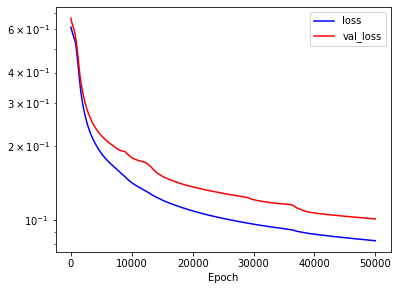

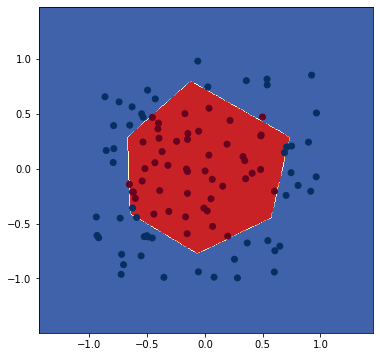

In [8]:
def test_Underfit():

    layers = [
        Input(2),
        Dense(3, act='relu'),
        Dense(1, act='sigmoid')
    ]

    # Train underfit scenario
    test_UnderfitOverfit(mTrain=500, mDev=100, noise=0.0, layers=layers)


test_Underfit()

## "Just right"

Skusime najst hyperparametre, pri ktorych model funguje celkom uspesne.


Epoch 0:  Loss = 1.2713842   Val_Loss = 1.1568485
Epoch 5000:  Loss = 0.0377137   Val_Loss = 0.0375460
Epoch 10000:  Loss = 0.0276294   Val_Loss = 0.0279711
Epoch 15000:  Loss = 0.0240313   Val_Loss = 0.0253745
Epoch 20000:  Loss = 0.0218908   Val_Loss = 0.0237303
Epoch 25000:  Loss = 0.0205841   Val_Loss = 0.0229478
Epoch 30000:  Loss = 0.0192574   Val_Loss = 0.0213871
Epoch 35000:  Loss = 0.0184417   Val_Loss = 0.0207705
Epoch 40000:  Loss = 0.0177518   Val_Loss = 0.0201897
Epoch 45000:  Loss = 0.0171697   Val_Loss = 0.0197730
Training complete.
Epoch 49999:  Loss = 0.0167055   Val_Loss = 0.0195419


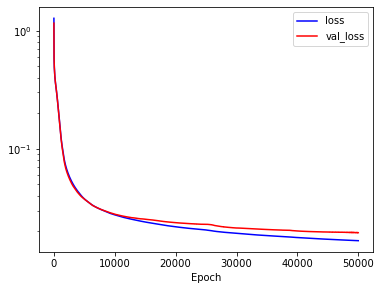

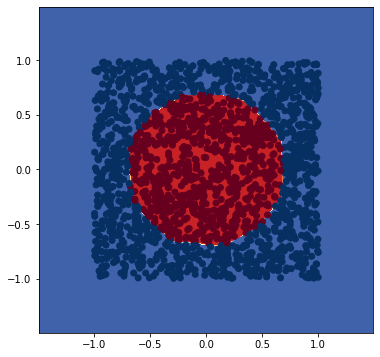

In [13]:
def test_JustRight():

    layers = [
        Input(2),
        Dense(8, act='relu'),
        Dense(8, act='relu'),
        Dense(1, act='sigmoid')
    ]

    # Train underfit scenario
    test_UnderfitOverfit(mTrain=5000, mDev=2000, noise=0.0, layers=layers)


test_JustRight()